In [32]:
pip install matplotlib

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import math
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from pandas import read_excel

In [34]:
my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'Tee.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df) # shows headers with top 5 rows

                       Tea  Theanine (mg in 1g tea)  Caffeine (mg in 1 g tea)  \
0             Matcha Basic                    10.00                     20.00   
1        Matcha Ceremonial                    20.00                     20.00   
2                   Sencha                     2.92                     11.32   
3                   Pu Erh                     0.01                     30.00   
4                Gunpowder                     3.83                     13.07   
5                   Oolong                     6.00                     20.00   
6                Earl Grey                     2.70                     16.48   
7   Darjeeling First Flush                     4.25                     14.10   
8                    Assam                     5.69                     19.93   
9                   Ceylon                     4.33                     14.61   
10              Pai Mu Tan                     1.30                      4.00   
11                 Chun Me  

In [35]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [36]:
df.columns = df.columns.str.strip()

In [37]:
df.set_index("Tea",drop=True,inplace=True)

In [38]:
# sort by Theanine content descending
df = df.sort_values('Theanine (mg in 1g tea)', ascending=False)

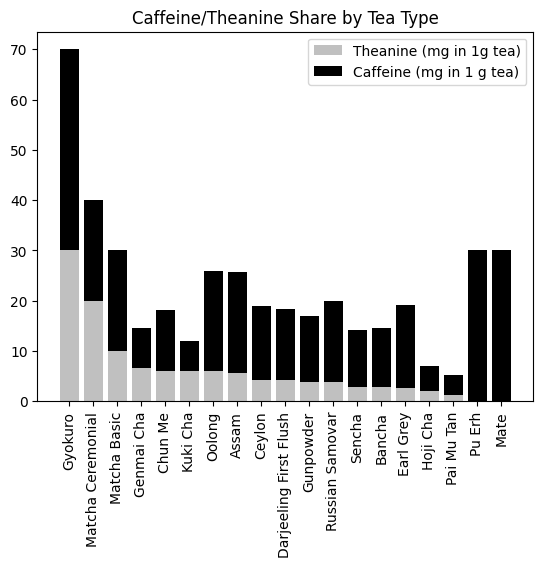

In [39]:
fig, ax = plt.subplots()

# First plot the 'Theanine (mg in 1g tea)' bars for every Tea
ax.bar(df.index, df['Theanine (mg in 1g tea)'], label='Theanine (mg in 1g tea)',color='#C0C0C0')

ax.bar(df.index, df['Caffeine (mg in 1 g tea)'], bottom=df['Theanine (mg in 1g tea)'],
       label='Caffeine (mg in 1 g tea)',color='#000000')

ax.set_title('Caffeine/Theanine Share by Tea Type')

ax.tick_params(axis='x', labelrotation=90)

ax.legend()

In [40]:
# sort by Caffeine content descending
df = df.sort_values('Caffeine (mg in 1 g tea)', ascending=False)

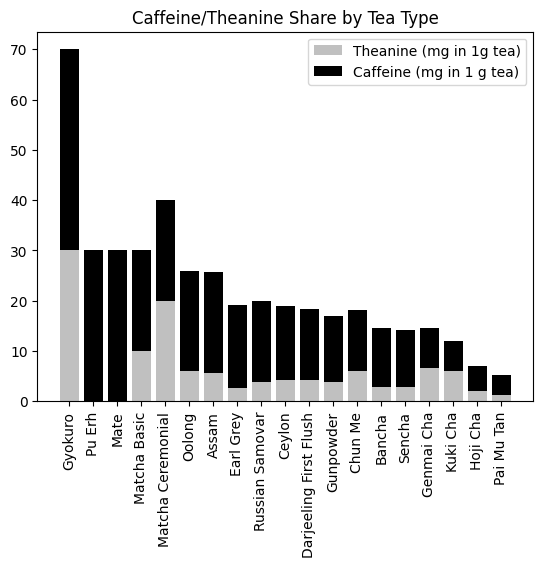

In [41]:
fig, ax = plt.subplots()

# First plot the 'Theanine (mg in 1g tea)' bars for every Tea
ax.bar(df.index, df['Theanine (mg in 1g tea)'], label='Theanine (mg in 1g tea)',color='#C0C0C0')

ax.bar(df.index, df['Caffeine (mg in 1 g tea)'], bottom=df['Theanine (mg in 1g tea)'],
       label='Caffeine (mg in 1 g tea)',color='#000000')

ax.set_title('Caffeine/Theanine Share by Tea Type')

ax.tick_params(axis='x', labelrotation=90)

ax.legend()

In [42]:
# sort by Average Elevation descending
df = df.sort_values('Average Elevation (m)', ascending=False)

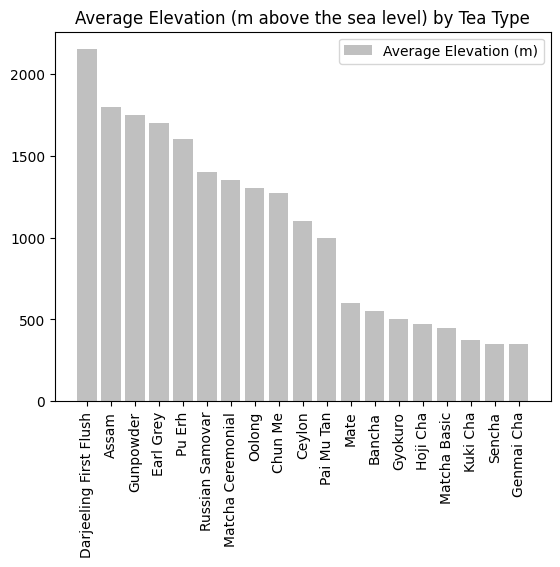

In [44]:
fig, ax = plt.subplots()

# Average Elevation (m above the sea level) bars for every Tea
ax.bar(df.index, df['Average Elevation (m)'], label='Average Elevation (m)',color='#C0C0C0')

ax.set_title('Average Elevation (m above the sea level) by Tea Type')

ax.tick_params(axis='x', labelrotation=90)

ax.legend()